In [1]:
import numpy as np, matplotlib.pyplot as plt, pandas as pd

In [2]:
# Create a few example curves through spline interpolation
curvePts = [
    [[10, 10, 20, 50, 20, 20, 20, 20],
     [20, 20, 30, 40, 70, 30, 30, 30]],
    [[10, 10, 10, 50, 30, 30, 30, 30],
     [10, 10, 10, 10, 50, 30, 30, 30]]
]

# Create interpolated curves
curveSmooth = []
for c in curvePts:
    a = []
    for k in c:
        p = np.poly1d(np.polyfit(np.arange(len(k)), k, 4))
        xn = np.linspace(0, len(k)-1, 100)
        a.append(p(xn))
    curveSmooth.append(a)

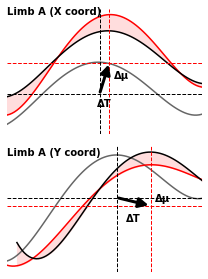

In [5]:
fig, ax = plt.subplots(2, 1, figsize=(3, 4))

for i in range(ax.shape[0]):
    ax[i].plot(curveSmooth[i][0], color='#666666', linestyle='-')
    ax[i].plot(curveSmooth[i][1], color='red')

    shf = pd.DataFrame(curveSmooth[i][0]).shift(np.argmax(curveSmooth[i][1]) - np.argmax(curveSmooth[i][0])).values[:,0]
    shf += np.mean(curveSmooth[i][1]) - np.mean(curveSmooth[0][0])
    ax[i].plot(shf, color='black')
    
    ax[i].fill_between(np.arange(shf.size), curveSmooth[i][1], shf, color='#ffdddd')
    
    ax[i].axhline(np.mean(curveSmooth[i][0]), color='black', linestyle='--', linewidth=1)
    ax[i].axhline(np.mean(curveSmooth[i][1]), color='red', linestyle='--', linewidth=1)

    ax[i].axvline(np.argmax(curveSmooth[i][0]), color='black', linestyle='--', linewidth=1)
    ax[i].axvline(np.argmax(curveSmooth[i][1]), color='red', linestyle='--', linewidth=1)
    
    ax[i].set_xlim(10, 90)
    
    ax[i].annotate("", xy=(np.argmax(curveSmooth[i][1]), np.mean(curveSmooth[i][1])), 
                   xytext=(np.argmax(curveSmooth[i][0]), np.mean(curveSmooth[i][0])),
                 arrowprops=dict(arrowstyle="-|>", color='black', lw=3), zorder=10, size=20)
    
    ax[i].set_axis_off()
    
    ax[i].text(10, max(np.max(curveSmooth[i][0]), np.max(curveSmooth[i][1])), ['Limb A (X coord)', 'Limb A (Y coord)'][i])

    ax[i].text(np.argmax(curveSmooth[i][0]) * 0.5 + np.argmax(curveSmooth[i][1]) * 0.5 - 3, 
               min(np.mean(curveSmooth[i][0]), np.mean(curveSmooth[i][1])) - 5, 'ΔT', zorder=20)
    
    ax[i].text(max(np.argmax(curveSmooth[i][0]), np.argmax(curveSmooth[i][1])) + 2, 
               0.5 * np.mean(curveSmooth[i][0]) + 0.5 * np.mean(curveSmooth[i][1]), 'Δμ', zorder=20)
    
fig.tight_layout()
fig.savefig('C:/Users/acorver/Desktop/paper-figures/Fig2a.pdf', dpi=1000)